In [1]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
import math as m
import cv2
import matplotlib.pylab as pl
from skimage.exposure import histogram
from scipy import signal
from skimage import io, util, filters, metrics, img_as_float

(-2.0, 2.0)

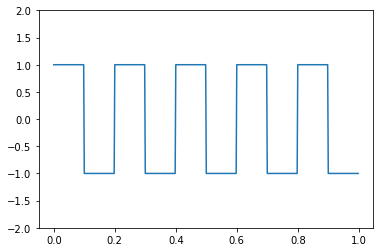

In [13]:
#график

y = np.linspace(0, 1, 500, endpoint=False)
plt.plot(y, signal.square(2 * np.pi * 5 * y))
plt.ylim(-2, 2)


In [14]:
#функция
def function():
    return (signal.square(2 * np.pi * 5 * y))
b = function()
print (b)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

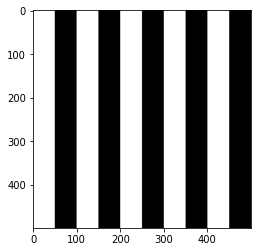

In [15]:
#изображение
def image(p):
    p = p * 255
    image = np.full((len(p), len(p)), fill_value=p)
    plt.imshow(image, cmap="gray")
     
    return image
a = image(b)
# print (a)

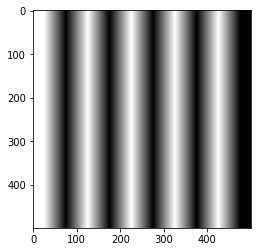

In [19]:
#линейный сглаживающий фильтр
lineImage = cv2.blur(a, (50, 50))
plt.imshow(lineImage, cmap='gray')
# print (lineImage.shape[1])

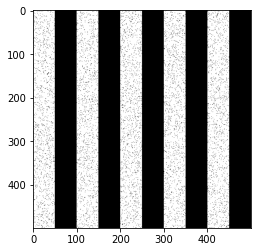

In [25]:
#импульсный шум
noiseImage = util.random_noise(a, "pepper", seed=25)
# sigma = 0.3
# noiseImage = util.random_noise(a, var=sigma ** 2)
plt.imshow(noiseImage, cmap='gray')

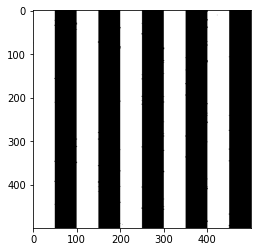

In [26]:
#медианная фильтрация
medianImage = filters.median(noiseImage, mode="mirror")
plt.imshow(medianImage, cmap='gray')

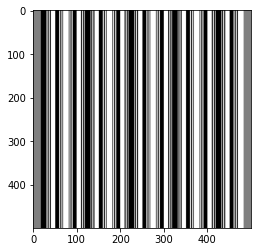

In [27]:
#Лапласиан
lapImage = np.array(lineImage.copy(), dtype=np.uint8)
lapImage = cv2.Laplacian(lapImage, cv2.CV_16S, ksize=17)
plt.imshow(lapImage, cmap='gray')

/var/folders/9x/8d905w9x7n91mqb0c__vyyf00000gn/T/ipykernel_20016/2745227427.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = lineImage.copy().astype(np.float)
/var/folders/9x/8d905w9x7n91mqb0c__vyyf00000gn/T/ipykernel_20016/2745227427.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = np.zeros((H + pad * 2, W + pad * 2), 

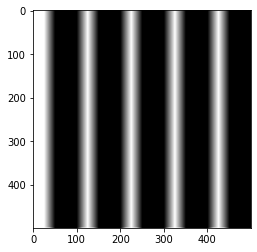

In [9]:

def laplacian_sharpening(img, K_size=3):
 H, W = img.shape
 # zero padding
 pad = K_size // 2

 out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)

 out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

 tmp = out.copy()

 # laplacian kernle

 K = [[0., 1., 0.],[1., -4., 1.], [0., 1., 0.]]

 # filtering and adding image -> Sharpening image

 for y in range(H):
  for x in range(W):
   # core code
    out[pad + y, pad + x] = (-1) * np.sum(K * (tmp[y: y + K_size, x: x + K_size])) + tmp[pad + y, pad + x]
 out = np.clip(out, 0, 255)
 out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

 return out

# Read Gray Scale image

img = lineImage.copy().astype(np.float)

# Image sharpening by laplacian filter

out = laplacian_sharpening(img, K_size=3)

plt.imshow(out, cmap='gray')